The purpose of this notebook is to create pretty graphs and pictures for the SRC

In [2]:
from Graphclass_module import Graphclass
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [2]:
edges = [(0,3,1),(1,3,1),(1,2,1),(3,1,0),(0,2,0),(2,0,0)]
W = np.array([[0,0,0.31958,1.5231],[0,0,1.9532,1.4387],[1.5553,0,0,0],[0,1.3741,0,0]])
G = nx.DiGraph()
for u, v, color in edges:
    G.add_edge(u, v, color=color)

In [3]:
def calculatecorrect(gt,test,n):
    correct = n
    for val in test:
        if val not in gt:
            correct -= 1
    for val in gt:
        if val not in test:
            correct -= 1
    return correct/n

In [6]:
for i in range(1,5):
    nvals = np.arange(4,25,2)
    avbfscorrect = []
    avswcorrect = []
    avgreedycorrect = []
    avfulltime = []
    avbfstime = []
    avswtime = []
    avgreedytime = []
    for n in nvals:
        print(n)
        if i <= 100:
            swcorrect = []

   
            timesw = []
      

            for _ in range(500):
                G = Graphclass(n,0,3, True)
    
                gt = G.zero_nodes
 
                G.swhueristic_predict(n/i)
 
                swvals = G.swhpredicted
     
           
                swcorrect.append(calculatecorrect(gt,swvals,n))
 
                timesw.append(G.swhflop)
   
            avswcorrect.append(np.mean(swcorrect))

            avswtime.append(np.mean(timesw))
    
    plt.figure()

    plt.plot(nvals, avswcorrect, label=f'SW n/{i}')

    plt.title('Average percent of nodes classified correctly')
    plt.ylabel('Percent correct')
    plt.xlabel('Number of nodes')
    plt.legend()
    plt.show()

    plt.figure()


    plt.plot(nvals, avswtime, label=f'SW n/{i}')
   
    plt.title('Average time')
    plt.ylabel('Time')
    plt.xlabel('Number of nodes')
    plt.legend()
    plt.show()



4
6
8
10
12
14


KeyboardInterrupt: 

In [9]:
I = Graphclass(10,0,2)

c:\Users\Jared\OneDrive\Supply chain\Supply-Chain\experiments\code\Graphclass_module.py:331: RuntimeWarning: divide by zero encountered in scalar divide
  cond = rho/min(abs(np.linalg.eigvals(matrix)))
c:\Users\Jared\OneDrive\Supply chain\Supply-Chain\experiments\code\Graphclass_module.py:331: RuntimeWarning: invalid value encountered in scalar divide
  cond = rho/min(abs(np.linalg.eigvals(matrix)))


In [10]:
I.use_premade(G,W)

In [12]:
for i in range(4):
    print(I.breadth_first(i)[0])

[[(2, 0, 0), (0, 2, 0)], [(2, 0, 0), (1, 2, 1), (3, 1, 0), (0, 3, 1), (1, 3, 1)]]
[[(3, 1, 0), (1, 3, 1), (0, 3, 1), (2, 0, 0), (1, 2, 1)], [(3, 1, 0), (1, 3, 1), (0, 3, 1), (2, 0, 0), (0, 2, 0)]]
[[(0, 2, 0), (2, 0, 0)], [(1, 2, 1), (3, 1, 0), (1, 3, 1), (0, 3, 1), (2, 0, 0)]]
[[(0, 3, 1), (1, 3, 1), (3, 1, 0), (2, 0, 0), (1, 2, 1)], [(0, 3, 1), (1, 3, 1), (3, 1, 0), (2, 0, 0), (0, 2, 0)]]


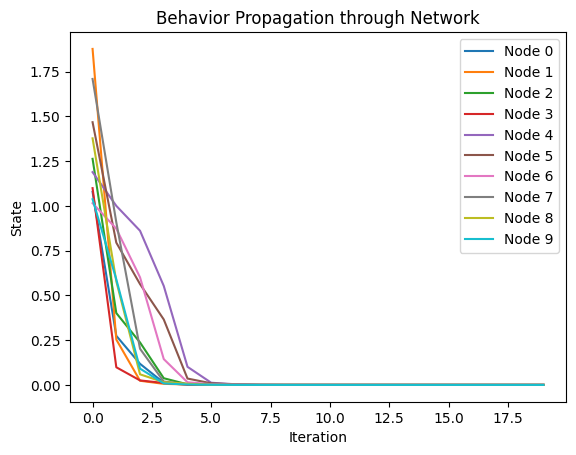

In [13]:
I.visualize_behavior()

In [36]:
J = I.perturb_initial()

IndexError: index 4 is out of bounds for axis 0 with size 4

In [57]:
my_dict = {0: 1.4, 3: .3, 1: 0.9, 2: 0.9}

In [55]:
I.history, _, _ = I.simulate_linear(initial=my_dict)

In [37]:
print(I.initial)

{0: 1.7010386012492986, 3: 1.3012926031606158, 1: 1.414202435896357, 2: 1.5038322499284813}


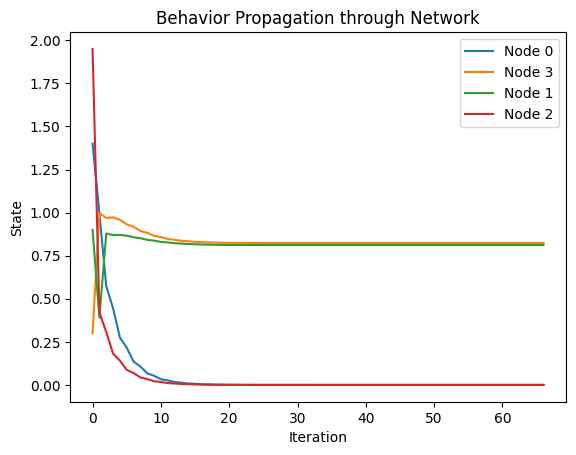

In [58]:
I.visualize_behavior()

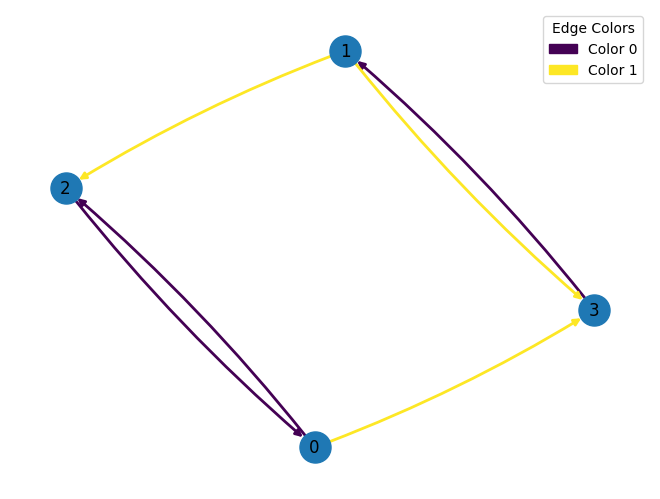

In [24]:
I.visualize_graph(I.G)

In [ ]:
colors = np.arange(2, 10,2)
# Initialize empty lists to hold the results for each color
all_avfulltimes = []
all_avtimes = []
all_avsub = []

# Loop over each color
for c in colors:
    nvals = np.arange(4, 32, 2)
    avfulltimes = []
    avtimes = []
    avsub = []

    # Loop over each value in nvals
    for n in nvals:
        print(f"Running for n={n}, color={c}")
        times = []
        fulltimes = []
        sub = []

      
        for i in range(250):
            G = Graphclass(n, 25, c, True)
            fulltimes.append(G.flop)
            times.append(G.flop / n)
            sub.append(len(G.full_subnetwork[0]))

        avfulltimes.append(np.mean(fulltimes))
        avtimes.append(np.mean(times))
        avsub.append(np.mean(sub))

    # Store the results for each color
    all_avfulltimes.append(avfulltimes)
    all_avtimes.append(avtimes)
    all_avsub.append(avsub)

# Plotting the results

# Plot for average computation time as a function of nodes
plt.figure()
for i, c in enumerate(colors):
    plt.plot(nvals, all_avtimes[i], label=f"{c} Colors")
plt.ylabel('Time in seconds')
plt.xlabel('Number of Nodes')
plt.title('Average computation time as a function of nodes with one target node')
plt.legend()
plt.show()

# Plot for time for full prediction as a function of nodes
plt.figure()
for i, c in enumerate(colors):
    plt.plot(nvals, all_avfulltimes[i], label=f"{c} Colors")
plt.ylabel('Time in seconds')
plt.xlabel('Number of nodes')
plt.title('Average time for full prediction as a function of nodes')
plt.legend()
plt.show()

# Plot for number of subnetworks as a function of nodes
plt.figure()
for i, c in enumerate(colors):
    plt.plot(nvals, all_avsub[i], label=f"{c} Colors")
plt.ylabel('Number of subnetworks')
plt.xlabel('Number of nodes')
plt.title('Average number of subnetworks as a function of nodes')
plt.legend()
plt.show()

In [3]:
def calculatecorrect(gt,test,n):
    correct = n
    for val in test:
        if val not in gt:
            correct -= 1
    for val in gt:
        if val not in test:
            correct -= 1
    return correct/n

4
6
8
10


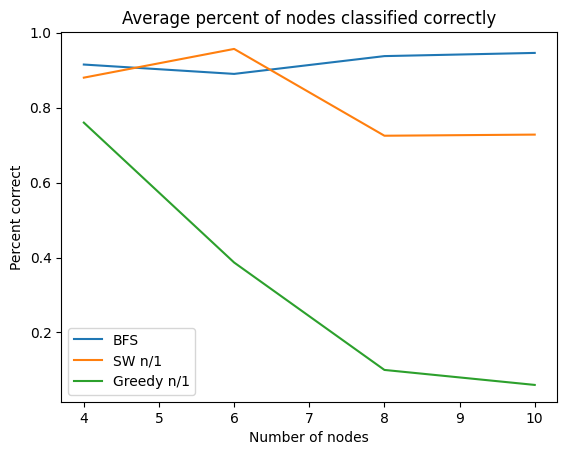

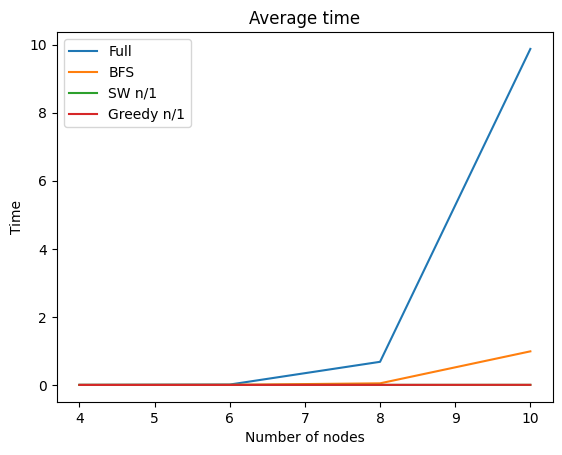

In [ ]:
for i in range(1,2):
    nvals = np.arange(4,12,2)
    avbfscorrect = []
    avswcorrect = []
    avgreedycorrect = []
    avfulltime = []
    avbfstime = []
    avswtime = []
    avgreedytime = []
    for n in nvals:
        print(n)
        if i <= 100:
            bfscorrect = []
            swcorrect = []
            greedycorrect = []
            timebfs = []
            timesw = []
            timegreedy = []
            timefull = []
            for _ in range(50):
                G = Graphclass(n,0,3, True)
                if G.converged:
                    gt = G.zero_nodes
                else:
                    gt = G.dirty_full_predicted
                G.swhueristic_predict(n/i)
                G.greedyhueristic_predict(n/i)
                bfsvals = G.dirty_predicted
                swvals = G.swhpredicted
                greedyvals = G.greedypredicted
                bfscorrect.append(calculatecorrect(gt,bfsvals,n))
                swcorrect.append(calculatecorrect(gt,swvals,n))
                greedycorrect.append(calculatecorrect(gt, greedyvals,n))
                timefull.append(G.fullflop)
                timebfs.append(G.bfsflop)
                timesw.append(G.swhflop)
                timegreedy.append(G.greedyflop)
            avbfscorrect.append(np.mean(bfscorrect))
            avswcorrect.append(np.mean(swcorrect))
            avgreedycorrect.append(np.mean(greedycorrect))
            avfulltime.append(np.mean(timefull))
            avbfstime.append(np.mean(timebfs))
            avswtime.append(np.mean(timesw))
            avgreedytime.append(np.mean(timegreedy))
    plt.figure()
    plt.plot(nvals, avbfscorrect, label="BFS")
    plt.plot(nvals, avswcorrect, label=f'SW n/{i}')
    plt.plot(nvals, avgreedycorrect, label =f'Greedy n/{i}')
    plt.title('Average percent of nodes classified correctly')
    plt.ylabel('Percent correct')
    plt.xlabel('Number of nodes')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(nvals, avfulltime, label='Full')
    plt.plot(nvals, avbfstime, label="BFS")
    plt.plot(nvals, avswtime, label=f'SW n/{i}')
    plt.plot(nvals, avgreedytime, label =f'Greedy n/{i}')
    plt.title('Average time')
    plt.ylabel('Time')
    plt.xlabel('Number of nodes')
    plt.legend()
    plt.show()



perform sensitivity analysis

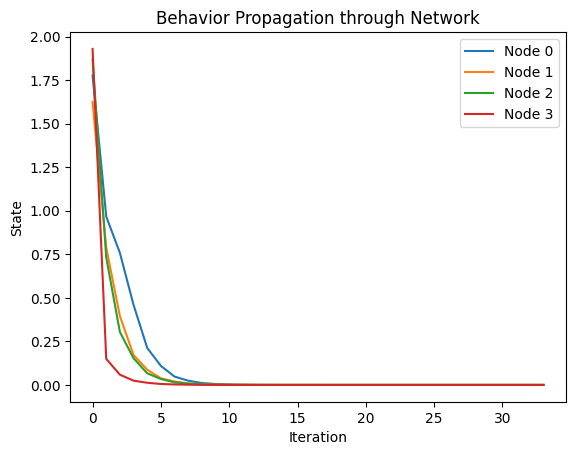

In [3]:
G= Graphclass(4,6,2)
G.visualize_behavior()

In [7]:
G.sensitivity_analysis()

array([[0.        , 0.45150812, 0.        , 0.        ],
       [0.42687163, 0.        , 0.55773299, 0.        ],
       [0.        , 0.101     , 0.        , 0.00414635],
       [0.        , 0.        , 0.0508863 , 0.        ]])

look at condition number 

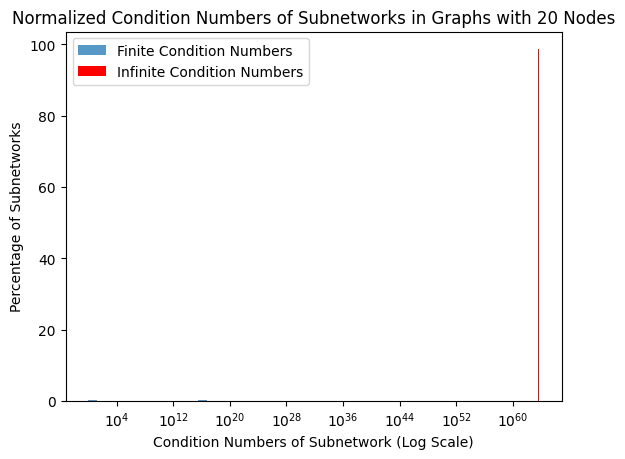

In [12]:
n_trials = 1000  # Number of trials to run
condition_numbers = []

# Collect condition numbers
for _ in range(n_trials):
    G = Graphclass(20, 0.3, 3)
    condition_numbers.extend(G.condition)  # Append all condition numbers

# Convert to NumPy array for easier handling
condition_numbers = np.array(condition_numbers)

# Separate finite and infinite values
finite_values = condition_numbers[np.isfinite(condition_numbers)]
num_infs = np.sum(~np.isfinite(condition_numbers))  # Count infinite values

# Define histogram bins (logarithmic scale)
bins = np.logspace(np.log10(max(1, finite_values.min())), np.log10(finite_values.max()), 50)

# Compute histogram counts
hist_counts, bin_edges = np.histogram(finite_values, bins=bins)

# Normalize counts to percentages
total_subnetworks = len(condition_numbers)
hist_percentages = (hist_counts / total_subnetworks) * 100
inf_percentage = (num_infs / total_subnetworks) * 100  # Percentage of infinite values

# Plot histogram of finite values with log-scaled x-axis
plt.bar(bin_edges[:-1], hist_percentages, width=np.diff(bin_edges), align='edge', alpha=0.75, label='Finite Condition Numbers')

# Add a separate bar for infinite values at the rightmost position
if num_infs > 0:
    plt.bar(bin_edges[-1] * 1.5, inf_percentage, width=bin_edges[-1] * 0.5, color='red', label='Infinite Condition Numbers')

# Set x-axis to log scale
plt.xscale('log')

# Labeling and title
plt.xlabel('Condition Numbers of Subnetwork (Log Scale)')
plt.ylabel('Percentage of Subnetworks')
plt.title(f'Normalized Condition Numbers of Subnetworks in Graphs with 20 Nodes')
plt.legend()

# Show plot
plt.show()

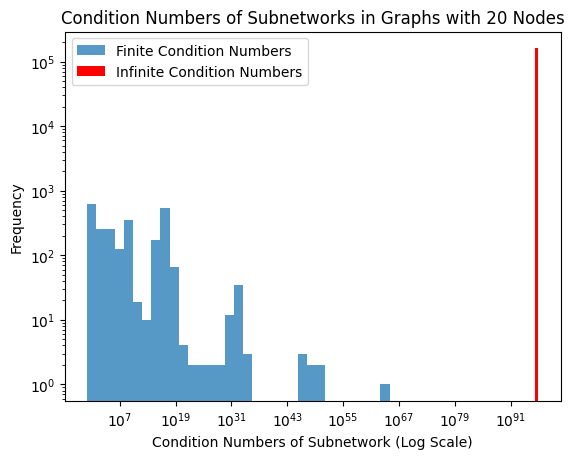

In [17]:
n_trials = 10000  # Number of trials to run
condition_numbers = []

for _ in range(n_trials):
    G = Graphclass(20, 0.3, 3)
    for i in range(len(G.condition)):

        cond = G.condition[i]
        condition_numbers.append(cond)

# Plot histogram of the spectral condition numbers
condition_numbers = np.array(condition_numbers)

# Separate finite and infinite values
finite_values = condition_numbers[np.isfinite(condition_numbers)]
num_infs = np.sum(~np.isfinite(condition_numbers))  # Count infinite values

bins = np.logspace(np.log10(max(1, finite_values.min())), np.log10(finite_values.max()), 50)

# Plot histogram of finite values with log-scaled x-axis
plt.hist(finite_values, bins=bins, alpha=0.75, label='Finite Condition Numbers')

# Add a separate bar for infinite values at the rightmost position
if num_infs > 0:
    plt.bar(bins[-1] * 1.5, num_infs, width=bins[-1]*2, color='red', label='Infinite Condition Numbers')

# Set x-axis to log scale
plt.xscale('log')
plt.yscale('log')
# Labeling and title
plt.xlabel('Condition Numbers of Subnetwork (Log Scale)')
plt.ylabel('Frequency')
plt.title(f'Condition Numbers of Subnetworks in Graphs with 20 Nodes')
plt.legend()

# Show plot
plt.show()